The exploratory data analysis below is to conduct a baseline research on the Queens housing market history by zip code. Primary purpose is to understand where the ZIP 11961 stands, and how it compares with other areas in Queens.

In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# data loading
df17 = pd.read_csv('queens2017.csv')
# data cleaning
df17.columns = df17.columns.str.replace(' ', '_')
df17.columns = df17.columns.str.replace('\n', '')
df17 = df17[df17['ZIP_CODE'] != 0]
df17['SALE_PRICE'] = df17['SALE_PRICE'].str.replace(',','').astype(int)
# statistics
df17_stat = df17.groupby(df17['ZIP_CODE']).mean()['SALE_PRICE']

Text(3,64,'QUEENS AVERAGE SOLD PRICE IN 2017 PER ZIP CODE ')

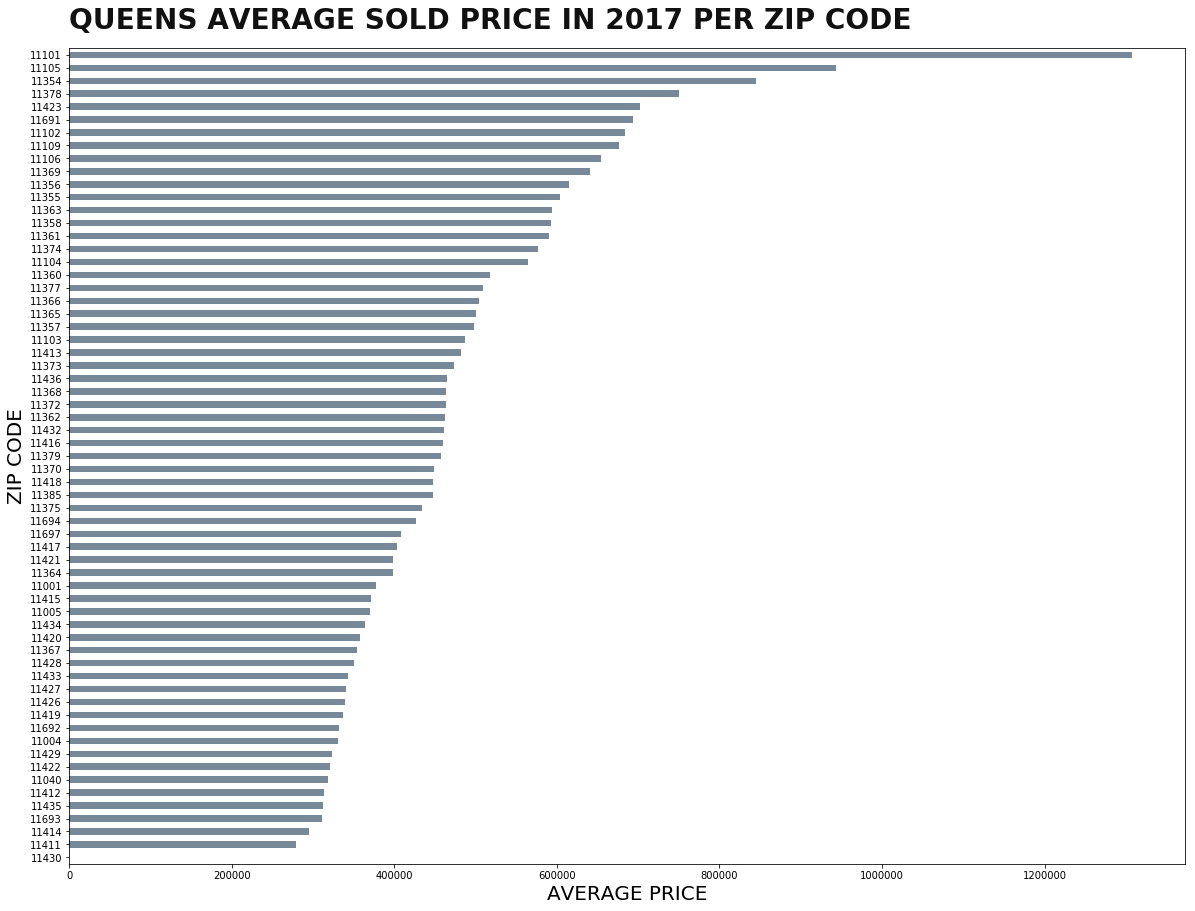

In [14]:
# basic plot
df17.groupby(df17['ZIP_CODE'])['SALE_PRICE'].mean().sort_values(ascending = True).plot(kind='barh', color='lightslategray')
plt.rcParams["figure.figsize"] = [20,15]
plt.xlabel('AVERAGE PRICE',fontsize=20)
plt.ylabel('ZIP CODE',fontsize=20)
plt.text(x=3, y=64, s="QUEENS AVERAGE SOLD PRICE IN 2017 PER ZIP CODE ", fontsize=28, weight='bold',alpha=.93)

In [5]:
# for year 2016 (note: each year has unique 'dirtyness' in the raw data, so cleaning code varies year by year)
df16 = pd.read_csv('queens2016.csv')
df16.columns = df16.columns.str.replace(' ', '_')
df16.columns = df16.columns.str.replace('\n', '')
df16 = df16[df16['ZIP_CODE'] != 0]
df16 = df16[df16['SALE_PRICE'].str.contains('-') == False]
df16['SALE_PRICE'] = df16['SALE_PRICE'].str.replace(',','').astype(int)
df16_stat = df16.groupby(df16['ZIP_CODE']).mean()['SALE_PRICE']

Text(3,64,'QUEENS AVERAGE SOLD PRICE IN 2016 PER ZIP CODE ')

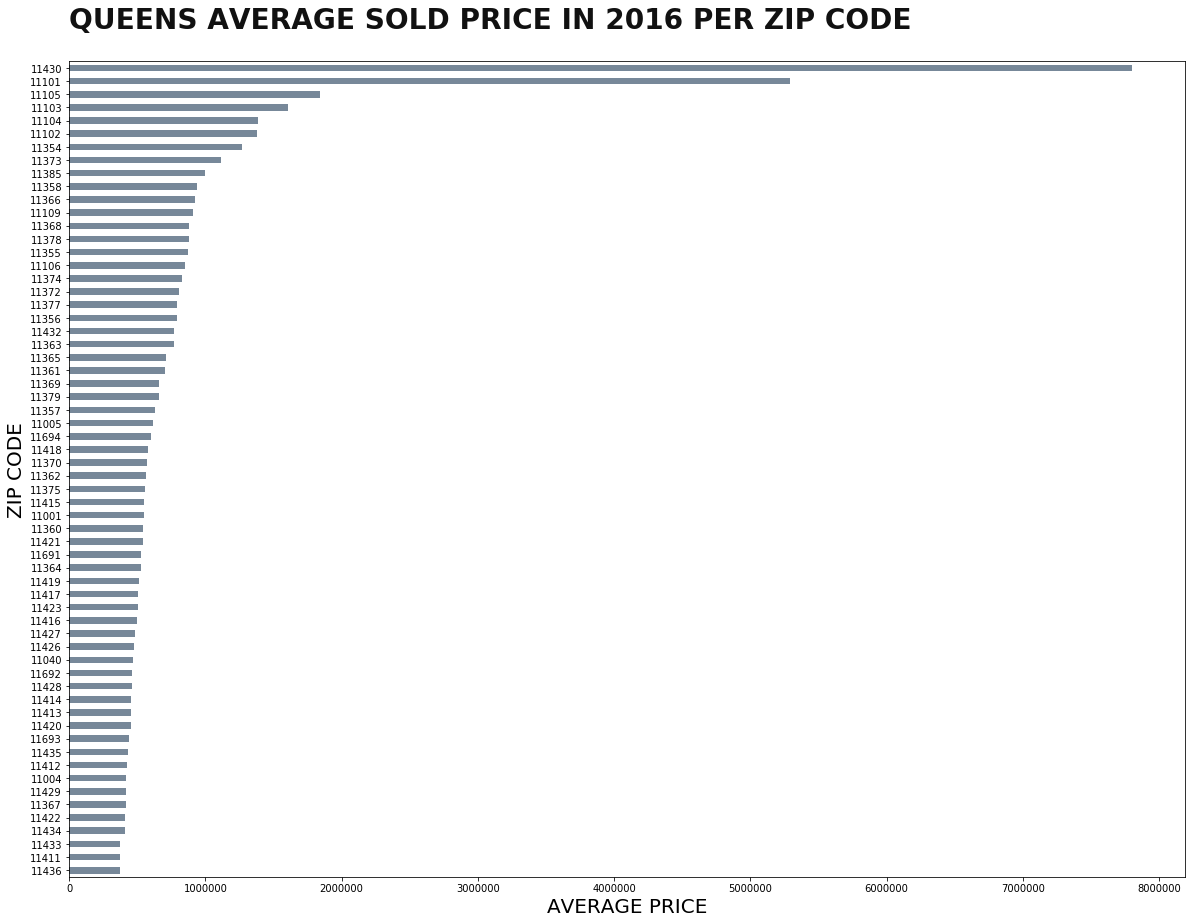

In [6]:
df16.groupby(df16['ZIP_CODE'])['SALE_PRICE'].mean().sort_values(ascending = True).plot(kind='barh', color='lightslategray')
plt.rcParams["figure.figsize"] = [20,15]
plt.xlabel('AVERAGE PRICE',fontsize=20)
plt.ylabel('ZIP CODE',fontsize=20)
plt.text(x=3, y=64, s="QUEENS AVERAGE SOLD PRICE IN 2016 PER ZIP CODE ", fontsize=28, weight='bold',alpha=.93)

In [7]:
df15 = pd.read_csv('queens2015.csv')
df15.columns = df15.columns.str.replace(' ', '_')
df15.columns = df15.columns.str.replace('\n', '')
df15 = df15[df15['ZIP_CODE'] != 0]
df15['SALE_PRICE'] = df15['SALE_PRICE'].str.replace('$','')
df15['SALE_PRICE'] = df15['SALE_PRICE'].str.replace(',','').astype(int)
df15_stat = df15.groupby(df15['ZIP_CODE']).mean()['SALE_PRICE']

Text(3,64,'QUEENS AVERAGE SOLD PRICE IN 2015 PER ZIP CODE ')

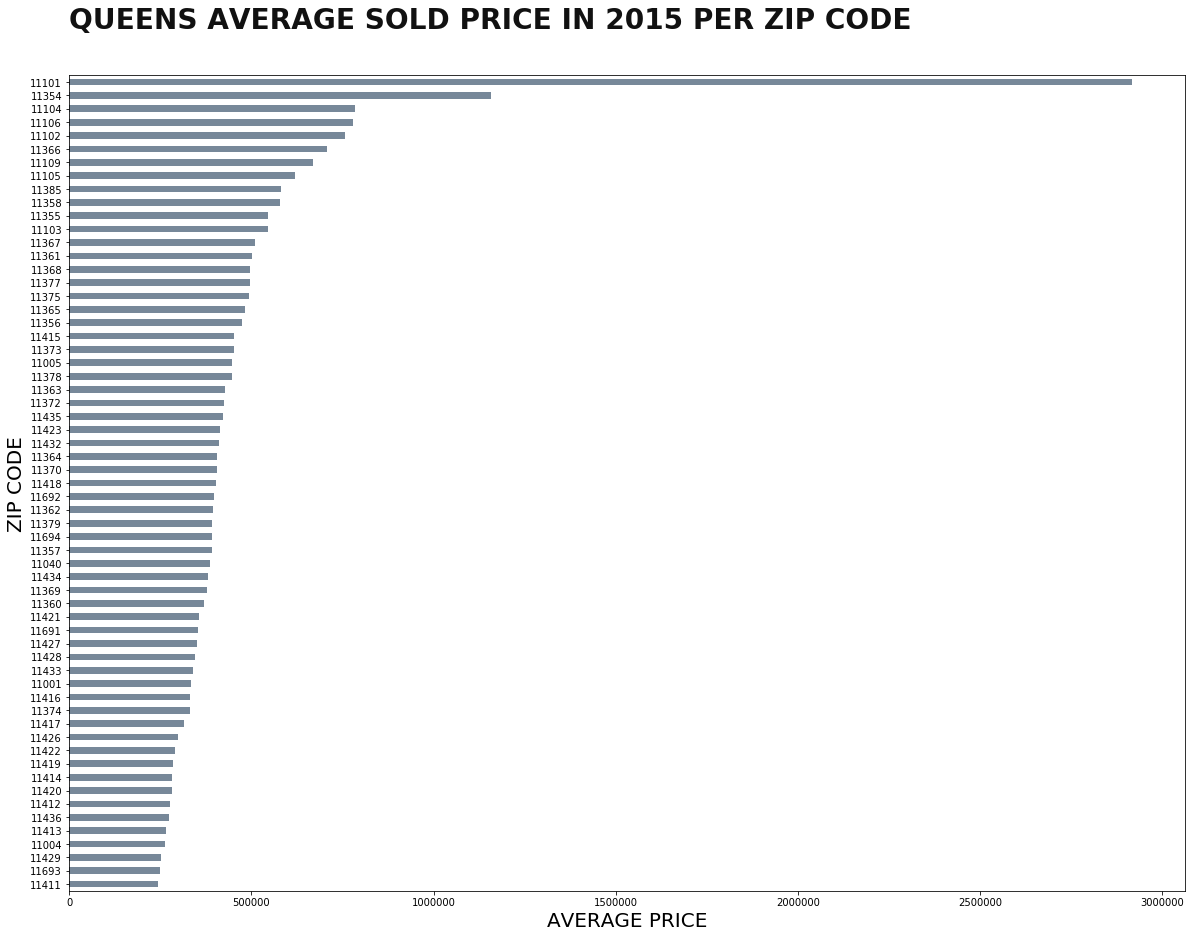

In [8]:
df15.groupby(df15['ZIP_CODE'])['SALE_PRICE'].mean().sort_values(ascending = True).plot(kind='barh', color='lightslategray')
plt.rcParams["figure.figsize"] = [20,15]
plt.xlabel('AVERAGE PRICE',fontsize=20)
plt.ylabel('ZIP CODE',fontsize=20)
plt.text(x=3, y=64, s="QUEENS AVERAGE SOLD PRICE IN 2015 PER ZIP CODE ", fontsize=28, weight='bold',alpha=.93)

In [9]:
df14 = pd.read_csv('queens2014.csv')
df14.columns = df14.columns.str.replace(' ', '_')
df14.columns = df14.columns.str.replace('\n', '')
df14 = df14[df14['ZIP_CODE'] != 0]
df14['SALE_PRICE'] = df14['SALE_PRICE'].str.replace('$','')
df14['SALE_PRICE'] = df14['SALE_PRICE'].str.replace(',','').astype(int)
df14_stat = df14.groupby(df14['ZIP_CODE']).mean()['SALE_PRICE']

Text(3,64,'QUEENS AVERAGE SOLD PRICE IN 2014 PER ZIP CODE ')

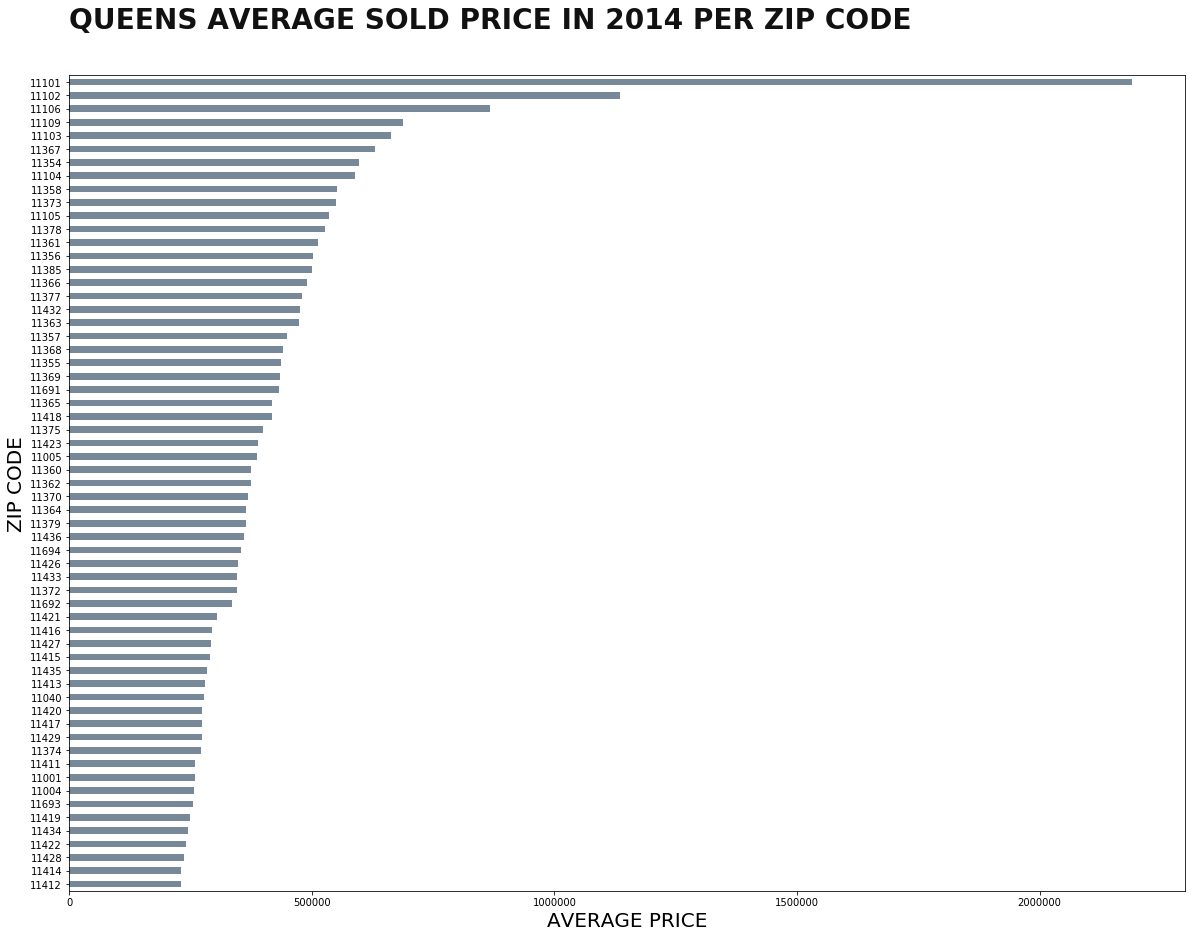

In [10]:
df14.groupby(df14['ZIP_CODE'])['SALE_PRICE'].mean().sort_values(ascending = True).plot(kind='barh', color='lightslategray')
plt.rcParams["figure.figsize"] = [20,15]
plt.xlabel('AVERAGE PRICE',fontsize=20)
plt.ylabel('ZIP CODE',fontsize=20)
plt.text(x=3, y=64, s="QUEENS AVERAGE SOLD PRICE IN 2014 PER ZIP CODE ", fontsize=28, weight='bold',alpha=.93)

In [11]:
df13 = pd.read_csv('queens2013.csv')
df13.columns = df13.columns.str.replace(' ', '_')
df13.columns = df13.columns.str.replace('\n', '')
df13 = df13[df13['ZIP_CODE'] != 0]
df13 = df13[df13['ZIP_CODE'].isnull() == False]
df13['ZIP_CODE'] = df13['ZIP_CODE'].astype(int)
# df13 has last row filled with NaN
df13 = df13.rename(columns = {'_SALE_PRICE_':'SALE_PRICE'})
df13['SALE_PRICE'] = df13['SALE_PRICE'].str.replace('$','')
df13['SALE_PRICE'] = df13['SALE_PRICE'].str.replace(',','')
df13 = df13[df13['SALE_PRICE'].str.contains('-') == False]
df13['SALE_PRICE'] = df13['SALE_PRICE'].astype(float)
df13['SALE_PRICE'] = df13['SALE_PRICE'].astype(int)
df13_stat = df13.groupby(df13['ZIP_CODE']).mean()['SALE_PRICE']

Text(3,64,'QUEENS AVERAGE SOLD PRICE IN 2013 PER ZIP CODE ')

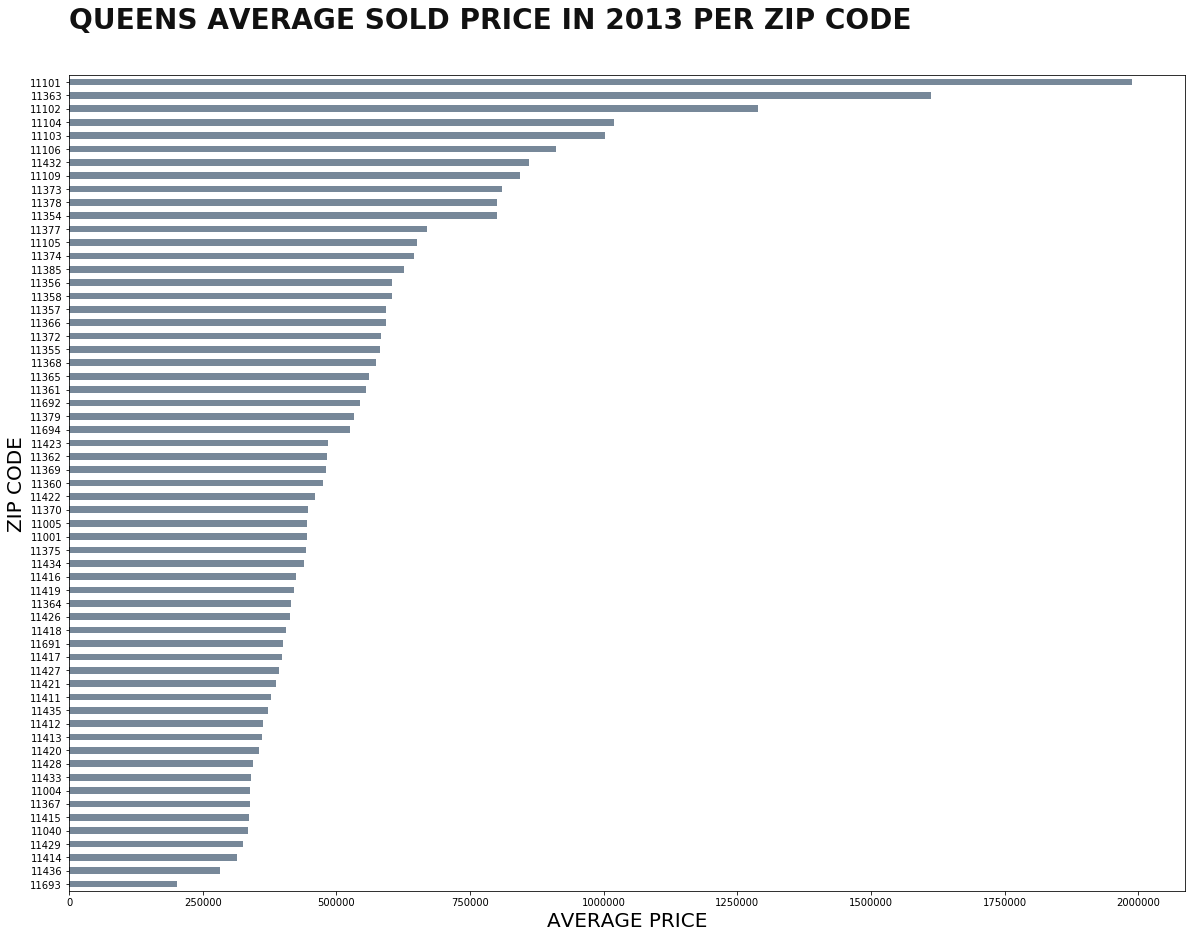

In [12]:
df13.groupby(df13['ZIP_CODE'])['SALE_PRICE'].mean().sort_values(ascending = True).plot(kind='barh', color='lightslategray')
plt.rcParams["figure.figsize"] = [20,15]
plt.xlabel('AVERAGE PRICE',fontsize=20)
plt.ylabel('ZIP CODE',fontsize=20)
plt.text(x=3, y=64, s="QUEENS AVERAGE SOLD PRICE IN 2013 PER ZIP CODE ", fontsize=28, weight='bold',alpha=.93)

([<matplotlib.axis.XTick at 0xfd0b830>,
 <a list of 5 Text xticklabel objects>)

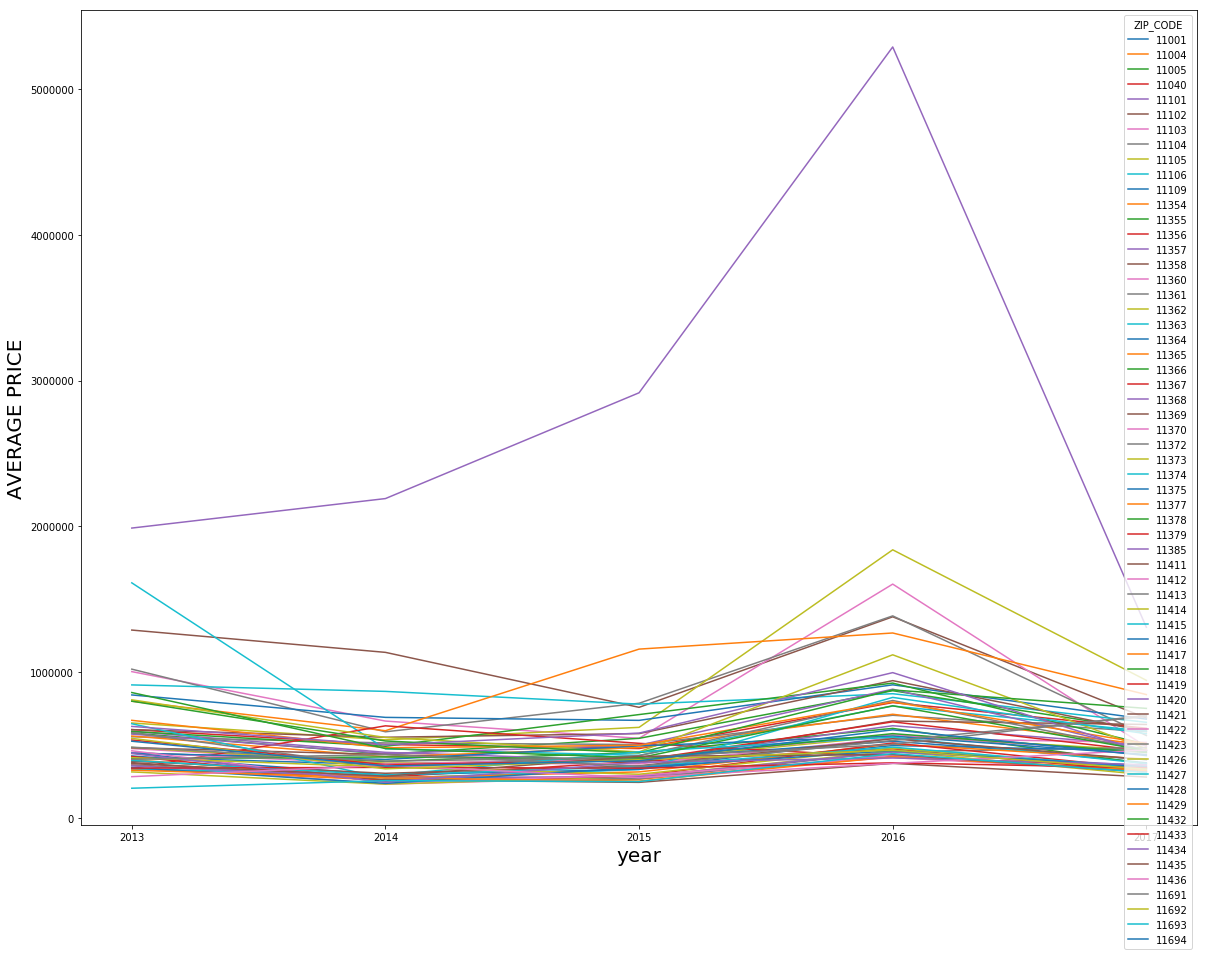

In [13]:
df_grand_stat = pd.concat([df13_stat, df14_stat, df15_stat, df16_stat, df17_stat], axis=1, join='outer')
df_grand_stat.columns = ['q13', 'q14', 'q15', 'q16', 'q17']
df_grand_stat = df_grand_stat[df_grand_stat.index != 11430]
df_grand_stat = df_grand_stat[df_grand_stat.index != 11697]
df_grand_stat_transpose = df_grand_stat.transpose()
df_grand_stat_transpose.plot()
plt.xlabel('year',fontsize=20)
plt.ylabel('AVERAGE PRICE',fontsize=20)
plt.xticks(np.arange(5), ('2013', '2014', '2015', '2016', '2017'))